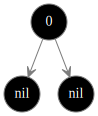

In [13]:
import algviz
import sys

global nil_node 
nil_node = 'nil'
viz = algviz.Visualizer(delay=1.0, wait=0.5)
class rb_node(algviz.BinaryTreeNode):
    def __init__(self, value = None, left = None, right = None, color=None, parent=None):
        super().__init__(value, algviz.BinaryTreeNode(left), algviz.BinaryTreeNode(right))
        self.parent = parent
        self.color = color
        
    def rb_insert(self, new_node):
        parent_node = None
        search_node = self
        while search_node != None:
            parent_node = search_node
            if new_node.val < search_node.val:
                if search_node.left.val == 'nil':
                    new_node.parent = parent_node
                    search_node.left = new_node
                search_node = search_node.left
            else:
                if search_node.right.val == 'nil':
                    new_node.parent = parent_node
                    search_node.right = new_node
                    
                search_node = search_node.right
        if parent_node == None:
            self = new_node
        elif new_node.val < parent_node.val:
            parent_node.left = new_node
        else:
            parent_node.right = new_node
        new_node.left = nil_node
        new_node.right = nil_node
        new_node.color = algviz.color_red
        self.rb_insert_fixup(new_node)

    def rb_insert_fixup(self, new_node):
        while new_node.parent.color == algviz.color_red:
            if new_node.parent == new_node.parent.parent.left:
                parent_node = new_node.parent.parent.right
                if parent_node.color == algviz.color_red:
                    new_node.parent.color = algviz.color_black
                    parent_node.color = algviz.color_black
                    new_node.parent.parent.color = algviz.color_red
                    new_node = new_node.parent.parent
                elif new_node == new_node.parent.right:
                    new_node = new_node.parent
                    self.left_rotation()
                else:
                    new_node.parent.color = algviz.color_black
                    new_node.parent.parent.color = algviz.color_red
                    self.right_rotation()
            else:
                parent_node = new_node.parent.parent.left
                if parent_node.color == algviz.color_red:
                    new_node.parent.color = algviz.color_black
                    parent_node.color = algviz.color_black
                    new_node.parent.parent.color = algviz.color_red
                    new_node = new_node.parent.parent
                elif new_node == new_node.parent.left:
                    new_node = new_node.parent
                    self.right_rotation()
                else:
                    new_node.parent.color = algviz.color_black
                    new_node.parent.parent.color = algviz.color_red
                    self.left_rotation()
        self.color = algviz.color_black
                

                    
    def left_rotation(self, pivot_node):
        pivot_successor = pivot_node.right
        pivot_node.right = pivot_successor.left
        if pivot_successor.left != nil_node:
            pivot_successor.left.parent = pivot_node
        elif pivot_node == pivot_node.parent.left:
            pivot_node.parent.left = pivot_successor
        else:
            pivot_node.parent.right = pivot_successor
        pivot_successor.left = pivot_node
        pivot_node.parent = pivot_successor

    def right_rotation(self, pivot_node):
        nil_node = self.__init__()
        pivot_successor = pivot_node.left
        pivot_node.left = pivot_successor.right
        if pivot_successor.right != nil_node:
            pivot_successor.right.parent = pivot_node
        elif pivot_node == pivot_node.parent.right:
            pivot_node.parent.right = pivot_successor
        else:
            pivot_node.parent.left = pivot_successor
        pivot_successor.right = pivot_node
        pivot_node.parent = pivot_successor

    def rb_transplant(self, u, v):
        if u.parent == nil_node:
            self = v
        elif u == u.parent.left:
            u.parent.left = v
        else:
            u.parent.right = v
        v.parent = u.parent
    
    def rb_delete(self, deletion_node):
        del_node = deletion_node
        del_node_color = deletion_node.color
        child_node = None
        if deletion_node.left == nil_node:
            child_node = deletion_node.right
            self.rb_transplant(deletion_node, deletion_node.left)
        elif deletion_node.right == nil_node:
            child_node = deletion_node.left
            self.rb_transplant(deletion_node, deletion_node.right)
        else:
            del_node = self.tree_minimum()
            del_node_color = del_node.color
            child_node = del_node.right
            if (del_node.parent == deletion_node):
                child_node.parent = del_node
            else:
                self.rb_transplant(del_node, del_node.right)
                del_node.right = deletion_node.right
                del_node.right.parent = del_node
            self.rb_transplant(deletion_node, del_node)
            del_node.left = deletion_node.left
            del_node.left.parent = del_node
            del_node.color = deletion_node.color
        if del_node_color == algviz.color_black:
            self.rb_delete_fixup(child_node)
    def rb_delete_fixup(self, child_node):
        while child_node != self and child_node.color == algviz.color_black:
            if child_node == child_node.parent.left:
                w = child_node.parent.right
                if w.color == algviz.color_red:
                    w.color = algviz.color_black
                    child_node.parent.color = algviz.color_red
                    self.left_rotation(child_node.parent)
                    w = child_node.parent.right
                elif w.right.color == algviz.color_black:
                    w.left.color = algviz.color_black
                    w.color = algviz.color_red
                    self.right_rotation(w)
                    w = child_node.parent.right
                w.color = child_node.parent.color
                child_node.parent.color = algviz.color_black
                w.right.color = algviz.color_black
                self.left_rotation(child_node.parent)
                child_node = self
            else:
                w = child_node.parent.left
                if w.color == algviz.color_red:
                    w.color = algviz.color_black
                    child_node.parent.color = algviz.color_red
                    self.right_rotation(child_node.parent)
                    w = child_node.parent.left
                elif w.left.color == algviz.color_black:
                    w.right.color = algviz.color_black
                    w.color = algviz.color_red
                    self.left_rotation(w)
                    w = child_node.parent.left
                w.color = child_node.parent.color
                child_node.parent.color = algviz.color_black
                w.left.color = algviz.color_black
                self.right_rotation(child_node.parent)
                child_node = self
        child_node.color = algviz.color_black

    def tree_maximum(self):
        search_node = self
        while search_node.right != None:
            search_node = search_node.right
        return search_node

    def tree_minimum(self):
        search_node = self
        while search_node.left != None:
            search_node = search_node.left
        return search_node
        

def main():
    logger = viz.createLogger(buffer_lines=3, name= "Prompt Text", show_line_num= False)
    logger.write("Insert your first node")
    viz.display()
    first_node_val = int(input())
    root = rb_node(first_node_val, nil_node, nil_node, color=algviz.color_black)
    binary_tree = viz.createGraph(data=root, name='Binary Tree')
    binary_tree.markNode(root.color, root, hold=True)
    binary_tree.markNode(root.color, root.left, hold=True)
    binary_tree.markNode(root.color, root.right, hold=True)
    viz.display()
    choice = ''
    logger.clear()
    viz.display()
    while choice != 'q':    
        logger.write("Would like to insert, delete, or search\nFor insert type 'i', For delete, type 'd', for search type 's', or type 'q' to quit")
        viz.display()
        choice = input()
        logger.clear()
        if choice == 'i':
            logger.write('inserting')
            viz.display()
            # root.rb_insert()
        elif choice == 'd':
            logger.write('deleting')
            viz.display()
        elif choice == 's':
            logger.write('searching')
            viz.display()
        elif choice == 'q':
            break
        else:
            logger.write('Please enter valid input')
            viz.display()
        logger.clear()
        viz.display()

if __name__ == "__main__":
    main()